In [3]:
import meep as mp
import matplotlib.pyplot as plt

-----------
Initializing structure...
time for choose_chunkdivision = 0.000334024 s
Working in 2D dimensions.
Computational cell is 125 x 125 x 0 with resolution 10
     cylinder, center = (0,62.5,0)
          radius 62.5, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,62.5,0)
          radius 20, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.56,2.56,2.56)
time for set_epsilon = 0.827481 s
-----------
Meep: using complex fields.


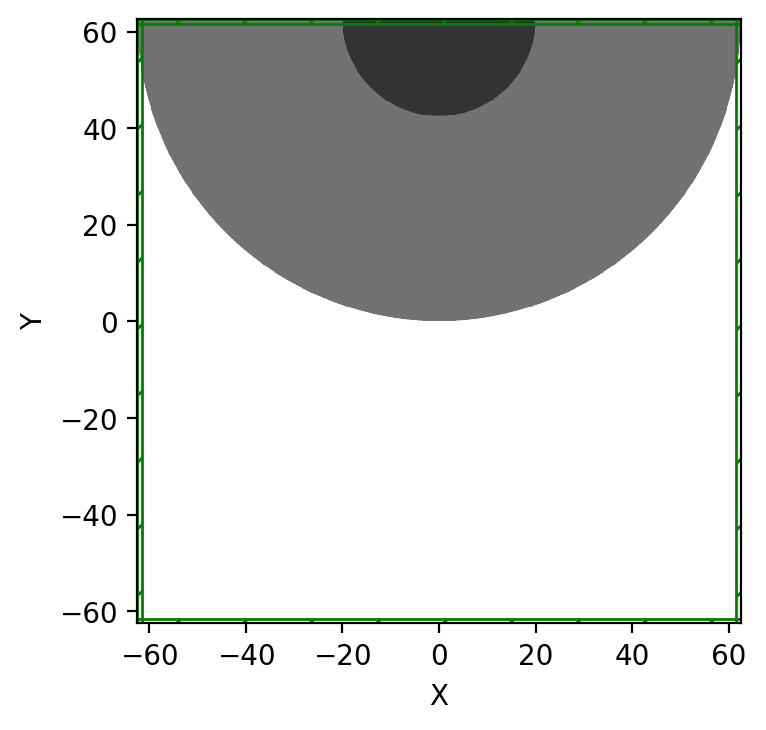

In [25]:



kpoint = mp.Vector3(x=0,y=0,z=1/1.55*1.445)




cell_size = mp.Vector3(125,125,0)

pml_layers = [
    mp.PML(thickness=1,direction=mp.X),
    mp.PML(thickness=1,direction=mp.Y)
    ]


dy = 62.5

Clad = mp.Cylinder(
    radius=62.5,
    height=mp.inf,
    center=mp.Vector3(y=dy),
    axis=mp.Vector3(0,0,1),
    material=mp.Medium(index=1.44)
    )

Core = mp.Cylinder(
    radius=20,
    height=mp.inf,
    center=mp.Vector3(y=dy),
    axis=mp.Vector3(0,0,1),
    material=mp.Medium(index=1.6)
    )




sim = mp.Simulation(
        cell_size=cell_size,
        geometry=[Clad,Core],
        resolution=10,
        #force_complex_fields=False,
        eps_averaging=False,
        boundary_layers=pml_layers,
        k_point=kpoint,
        ensure_periodicity=False
        )

plt.figure(dpi=200)
sim.plot2D(eps_parameters={'alpha':0.8, 'interpolation':'none'})
plt.show()